[texte du lien](https:// [texte du lien](https:// [texte du lien](https://)))# Unification des Données
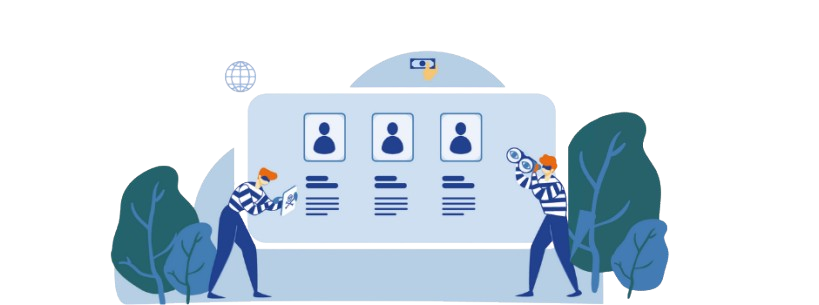

## Contexte
Dans un monde de plus en plus globalisé, les entreprises et les organisations collectent des données à partir de différentes sources et dans différentes langues. Cela peut entraîner des incohérences dans les données, notamment lorsque des informations similaires sont enregistrées sous différentes formes. Par exemple, le nom d'une personne peut être enregistré sous différentes orthographes dans plusieurs bases de données en raison des variations linguistiques.

##Objectif :
Développer un modèle de machine learning capable d'unifier des enregistrements de données redondants ou similaires en détectant les doublons, en particulier ceux où les noms, prénoms ou autres informations peuvent varier (par exemple, orthographe, phonétique, ou ordre des mots).

Notre solution utilise l'IA et l'analyse de données pour identifier les enregistrements similaires et déterminer lesquels peuvent être fusionnés pour assurer une base de données propre et cohérente. En analysant divers facteurs tels que l'orthographe des noms, les informations de contact et d'autres données pertinentes, nous pouvons identifier les enregistrements à fusionner

##Approche :


1.   Collecte de données
2.   Analyse exploratoire des données (EDA)
3.   Prétraitement des données
4.   Développement du modèle
5.   Évaluation du modèle
6.   Prédiction et interprétation
7.   Mise en œuvre

# Collecte de données

In [ ]:
import pandas as pd

try:
    df = pd.read_csv('personnes.csv')  # Remplace 'personnes.csv' par ton fichier existant
except FileNotFoundError:
    df = pd.DataFrame(columns=['Nom', 'Prénom', 'CIN', 'Date de naissance', 'Lieu', 'Email', 'Sexe'])

def ajouter_personne_manuellement():
    nom = input("Entrez le nom : ").lower()
    prenom = input("Entrez le prénom : ").lower()
    cin = input("Entrez le CIN : ")
    date_naissance = input("Entrez la date de naissance (jj/mm/aaaa) : ")
    lieu = input("Entrez le lieu : ").lower()
    email = input("Entrez l'email : ").lower()
    sexe = input("Entrez le sexe (M/F) : ").upper()

    nouvelle_personne = {
        'Nom': nom,
        'Prénom': prenom,
        'CIN': cin,
        'Date de naissance': date_naissance,
        'Lieu': lieu,
        'Email': email,
        'Sexe': sexe,
    }

    global df
    df = pd.concat([df, pd.DataFrame([nouvelle_personne])], ignore_index=True)

while True:
    ajouter_personne_manuellement()
    continuer = input("Voulez-vous ajouter une autre personne ? (o/n) : ").lower()
    if continuer != 'o':
        break

df.to_csv('personnes.csv', index=False)

print("Les informations ont été sauvegardées dans 'personnes.csv'.")

Entrez le nom : mosbeh
Entrez le prénom : azize
Entrez le CIN : 
Entrez la date de naissance (jj/mm/aaaa) : 15/09/2001
Entrez le lieu : gabes
Entrez l'email : mosbah12@gmail.com
Entrez le sexe (M/F) : M
Voulez-vous ajouter une autre personne ? (o/n) : n
Les informations ont été sauvegardées dans 'personnes.csv'.


# Analyse exploratoire des données (EDA)

In [ ]:
import pandas as pd
df = pd.read_csv('/content/personnes.csv')

df

,Nom,Prénom,CIN,Date de naissance,Lieu,Email,Sexe
0,baya,chiheb,12345678.0,28/11/2000,msaken,chattichiheb35@gmail.com,M
1,matoug,mahdi,14725836.0,20/05/1998,sousse,mahdi28@gmail.com,M
2,beya,chiheb,12345678.0,28/11/2000,sousse,chiheb@gmail.com,M
3,zorgati,amine,12870448.0,10/02/1999,sousse,zorgati@gmail.com,M
4,hadded,chema,12457896.0,04/10/1999,monastir,chema@gmail.com,F
...,...,...,...,...,...,...,...
203,zaier,tarik,39528888.0,22/05/1990,gafsa,tarek.zaier@yahoo.com,M
204,ghouma,imeen,35795679.0,01/06/1978,sousse,iman.ghouma@outlook.com,M
205,tounsi,ahmd,16463940.0,14/11/1960,tunis,ahmed.tounsi@yahoo.com,M
206,boubaker,salim,12485635.0,25/11/2000,sousse,salem@gmail.com,F


In [ ]:
df.shape

(208, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Nom                208 non-null    object 
 1   Prénom             208 non-null    object 
 2   CIN                207 non-null    float64
 3   Date de naissance  205 non-null    object 
 4   Lieu               206 non-null    object 
 5   Email              203 non-null    object 
 6   Sexe               208 non-null    object 
dtypes: float64(1), object(6)
memory usage: 11.5+ KB


In [ ]:
df.isnull().sum()

,0
Nom,0
Prénom,0
CIN,1
Date de naissance,3
Lieu,2
Email,5
Sexe,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df['Sexe'].value_counts()

,count
Sexe,
M,121
F,87


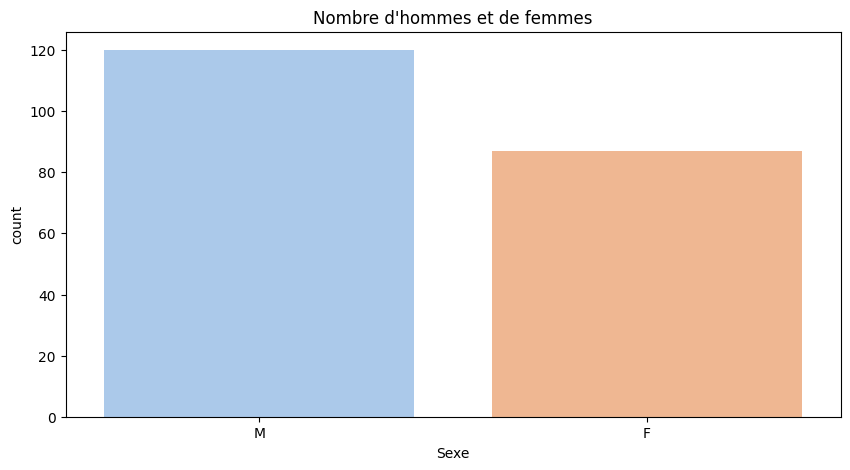

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))

sns.countplot(x='Sexe', data=df, hue='Sexe', palette='pastel', dodge=False)

plt.legend([],[], frameon=False)

plt.title("Nombre d'hommes et de femmes")

plt.show()


In [ ]:
df_copy = df.copy()
df_copy

,Nom,Prénom,CIN,Date de naissance,Lieu,Email,Sexe
0,baya,chiheb,12345678.0,28/11/2000,msaken,chattichiheb35@gmail.com,M
1,matoug,mahdi,14725836.0,20/05/1998,sousse,mahdi28@gmail.com,M
2,beya,chiheb,12345678.0,28/11/2000,sousse,chiheb@gmail.com,M
3,zorgati,amine,12870448.0,10/02/1999,sousse,zorgati@gmail.com,M
4,hadded,chema,12457896.0,04/10/1999,monastir,chema@gmail.com,F
...,...,...,...,...,...,...,...
203,zaier,tarik,39528888.0,22/05/1990,gafsa,tarek.zaier@yahoo.com,M
204,ghouma,imeen,35795679.0,01/06/1978,sousse,iman.ghouma@outlook.com,M
205,tounsi,ahmd,16463940.0,14/11/1960,tunis,ahmed.tounsi@yahoo.com,M
206,boubaker,salim,12485635.0,25/11/2000,sousse,salem@gmail.com,F


In [ ]:
from datetime import datetime
df['Date de naissance'] = pd.to_datetime(df['Date de naissance'], errors='coerce')
current_year = datetime.now().year
df['Age'] = current_year - df['Date de naissance'].dt.year

<ipython-input-177-ee539dc69ae4>:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date de naissance'] = pd.to_datetime(df['Date de naissance'], errors='coerce')


In [ ]:
df

,Nom,Prénom,CIN,Date de naissance,Lieu,Email,Sexe,Age
0,baya,chiheb,12345678,2000-11-28,msaken,chattichiheb35@gmail.com,M,24.0
1,matoug,mahdi,14725836,1998-05-20,sousse,mahdi28@gmail.com,M,26.0
2,beya,chiheb,12345678,2000-11-28,sousse,chiheb@gmail.com,M,24.0
3,zorgati,amine,12870448,1999-02-10,sousse,zorgati@gmail.com,M,25.0
4,hadded,chema,12457896,1999-10-04,monastir,chema@gmail.com,F,25.0
...,...,...,...,...,...,...,...,...
202,ladhary,cyrin,10408965,2003-05-12,sfax,cyrine@gmail.com,F,21.0
203,zaier,tarik,39528888,1990-05-22,gafsa,tarek.zaier@yahoo.com,M,34.0
204,ghouma,imeen,35795679,1978-06-01,sousse,iman.ghouma@outlook.com,M,46.0
205,tounsi,ahmd,16463940,1960-11-14,tunis,ahmed.tounsi@yahoo.com,M,64.0


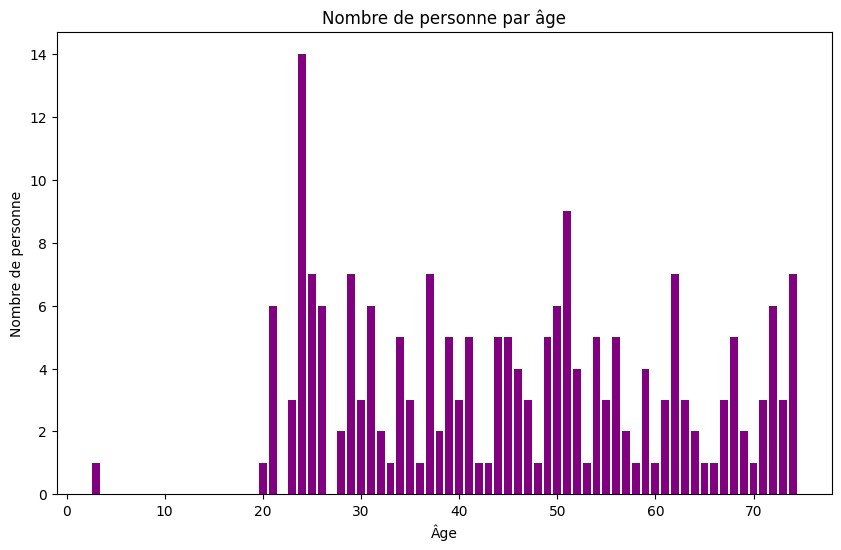

In [ ]:
import matplotlib.pyplot as plt

age_count = df['Age'].value_counts()


plt.figure(figsize=(10, 6))

plt.bar(age_count.index, age_count.values, color='purple')

plt.title("Nombre de personne par âge")

plt.xlabel("Âge")
plt.ylabel("Nombre de personne")

plt.show()


In [ ]:
df['Lieu'].value_counts()

,count
Lieu,
tunis,25
monastir,22
nabeul,20
sousse,20
sfax,19
gabes,19
gafsa,18
kairouan,15
djerba,13


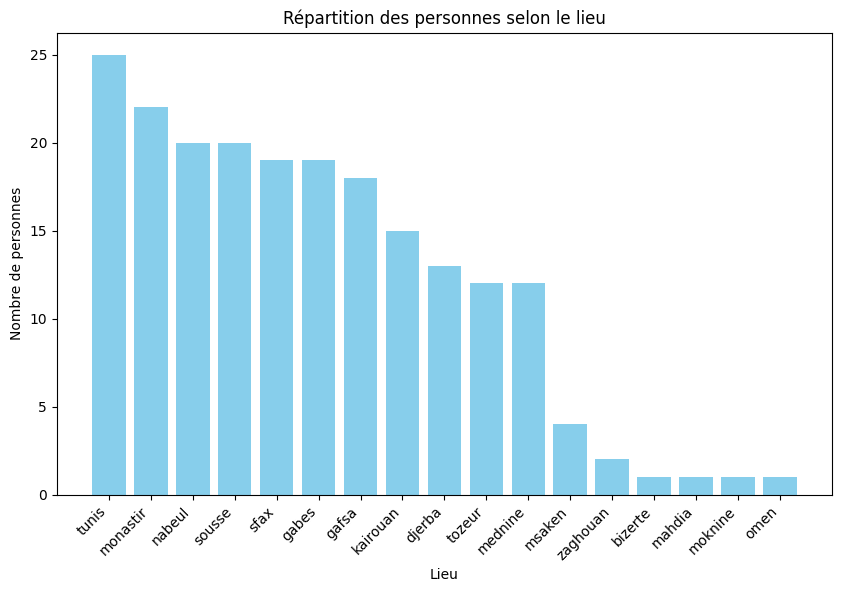

In [ ]:
import matplotlib.pyplot as plt

lieu_counts = df['Lieu'].value_counts()

plt.figure(figsize=(10, 6))

plt.bar(lieu_counts.index, lieu_counts.values, color='skyblue')

plt.title("Répartition des personnes selon le lieu")

plt.xlabel("Lieu")
plt.ylabel("Nombre de personnes")

plt.xticks(rotation=45, ha='right')

plt.show()


# Prétraitement des données :


###  Utiliser des techniques telles que l'encodage phonétique (Soundex)

In [ ]:
def soundex(name):
    """ Convertir un nom en son code Soundex correspondant avec gestion Unicode. """
    # Tableau de mapping Soundex pour les consonnes
    soundex_mapping = {
        'a': '', 'e': '', 'i': '', 'o': '', 'u': '', 'y': '', 'h': '', 'w': '',
        'b': '1', 'f': '1', 'p': '1', 'v': '1',
        'c': '2', 'g': '2', 'j': '2', 'k': '2', 'q': '2', 's': '2', 'x': '2', 'z': '2',
        'd': '3', 't': '3',
        'l': '4',
        'm': '5', 'n': '5',
        'r': '6'
    }

    # Assurer que le nom est en Unicode et normalisé pour la comparaison
    name = name.lower().strip()
    first_letter = name[0].upper()
    tail = name[1:]

    # Convertir les lettres en leurs codes Soundex respectifs
    soundex_numbers = [soundex_mapping.get(char, '') for char in tail] # Return empty string if no mapping

    # Éliminer les doublons consécutifs
    filtered_numbers = []
    for number in soundex_numbers:
        if not filtered_numbers or (number != filtered_numbers[-1]):
            filtered_numbers.append(number)

    # Retirer les codes vides
    filtered_numbers = [num for num in filtered_numbers if num != '']

    # Construire le code Soundex: première lettre + trois chiffres
    soundex_code = first_letter + ''.join(filtered_numbers)[:3]

    # Assurer que le code est de longueur 4
    soundex_code = soundex_code.ljust(4, '0')

    return soundex_code

In [ ]:
df_copy['Prénom_Soundex'] = df_copy['Prénom'].apply(soundex)
df_copy['Nom_Soundex'] = df_copy['Nom'].apply(soundex)
df_copy

,Nom,Prénom,CIN,Date de naissance,Lieu,Email,Sexe,Prénom_Soundex,Nom_Soundex
0,baya,chiheb,12345678.0,28/11/2000,msaken,chattichiheb35@gmail.com,M,C100,B000
1,matoug,mahdi,14725836.0,20/05/1998,sousse,mahdi28@gmail.com,M,M300,M320
2,beya,chiheb,12345678.0,28/11/2000,sousse,chiheb@gmail.com,M,C100,B000
3,zorgati,amine,12870448.0,10/02/1999,sousse,zorgati@gmail.com,M,A550,Z623
4,hadded,chema,12457896.0,04/10/1999,monastir,chema@gmail.com,F,C500,H330
...,...,...,...,...,...,...,...,...,...
203,zaier,tarik,39528888.0,22/05/1990,gafsa,tarek.zaier@yahoo.com,M,T620,Z600
204,ghouma,imeen,35795679.0,01/06/1978,sousse,iman.ghouma@outlook.com,M,I550,G500
205,tounsi,ahmd,16463940.0,14/11/1960,tunis,ahmed.tounsi@yahoo.com,M,A530,T520
206,boubaker,salim,12485635.0,25/11/2000,sousse,salem@gmail.com,F,S450,B126


In [ ]:
df_copy['Soundex'] = df_copy['Prénom_Soundex'] + '_' + df_copy['Nom_Soundex']
df_copy

,Nom,Prénom,CIN,Date de naissance,Lieu,Email,Sexe,Prénom_Soundex,Nom_Soundex,Soundex
0,baya,chiheb,12345678.0,28/11/2000,msaken,chattichiheb35@gmail.com,M,C100,B000,C100_B000
1,matoug,mahdi,14725836.0,20/05/1998,sousse,mahdi28@gmail.com,M,M300,M320,M300_M320
2,beya,chiheb,12345678.0,28/11/2000,sousse,chiheb@gmail.com,M,C100,B000,C100_B000
3,zorgati,amine,12870448.0,10/02/1999,sousse,zorgati@gmail.com,M,A550,Z623,A550_Z623
4,hadded,chema,12457896.0,04/10/1999,monastir,chema@gmail.com,F,C500,H330,C500_H330
...,...,...,...,...,...,...,...,...,...,...
203,zaier,tarik,39528888.0,22/05/1990,gafsa,tarek.zaier@yahoo.com,M,T620,Z600,T620_Z600
204,ghouma,imeen,35795679.0,01/06/1978,sousse,iman.ghouma@outlook.com,M,I550,G500,I550_G500
205,tounsi,ahmd,16463940.0,14/11/1960,tunis,ahmed.tounsi@yahoo.com,M,A530,T520,A530_T520
206,boubaker,salim,12485635.0,25/11/2000,sousse,salem@gmail.com,F,S450,B126,S450_B126


In [ ]:
output_final_path2 = '/content/dataSoundexFinal.csv'

df_copy.to_csv(output_final_path2, index=False)

In [ ]:
from itertools import combinations

pairs = []

grouped = df_copy.groupby(['Soundex'])

for _, group in grouped:
    if len(group) > 1:  # Si le groupe contient plus d'un enregistrement
        indices = group.index
        for pair in combinations(indices, 2):
            pairs.append(pair)

print(f'Nombre de paires créées: {len(pairs)}')
print(pairs[:5])  # Afficher les 5 premières paires

Nombre de paires créées: 155
[(12, 207), (60, 165), (51, 69), (51, 117), (51, 181)]


In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Nom                208 non-null    object 
 1   Prénom             208 non-null    object 
 2   CIN                207 non-null    float64
 3   Date de naissance  205 non-null    object 
 4   Lieu               206 non-null    object 
 5   Email              203 non-null    object 
 6   Sexe               208 non-null    object 
 7   Prénom_Soundex     208 non-null    object 
 8   Nom_Soundex        208 non-null    object 
 9   Soundex            208 non-null    object 
dtypes: float64(1), object(9)
memory usage: 16.4+ KB


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Données de correspondance avec les features et les labels
data = []

for i, j in pairs:
    row1 = df_copy.loc[i]
    row2 = df_copy.loc[j]

    # Vérification si l'un ou les deux n'ont pas de CIN
    cin_absent = ((row1['CIN'] == 0) or (row2['CIN'] == 0))
    # Créer les features de correspondance
    features = {
        'Email_Match': int(row1['Email'] == row2['Email']),
        'CIN_Match': int(row1['CIN'] == row2['CIN']),
        'Date_Match': int(row1['Date de naissance'] == row2['Date de naissance']),
        'Sexe_Match': int(row1['Sexe'] == row2['Sexe']),
        'Lieu_Match': int(row1['Lieu'] == row2['Lieu']),
    }

    # Calcul du score de similarité
    if features['CIN_Match']:
        score = 100  # Si les CIN sont identiques, 100% de similarité
    elif features['Email_Match']:
        score = 100  # Si les emails sont identiques et CIN manquant, 100% de similarité
    else:
        # Calcul proportionnel pour les autres critères (s'il n'y a pas de match CIN/Email 100%)
        total_criteria = 5  # Date, Sexe, Lieu (les autres critères)
        matches = features['Date_Match'] + features['Sexe_Match'] + features['Lieu_Match']
        score = (matches / total_criteria) * 100  # Calculer un pourcentage basé sur les correspondances restantes

    # Label basé sur un seuil de 80 % par exemple
    label = 1 if score >= 50 else 0

    features['Label'] = label

    data.append(features)

# Créer un DataFrame à partir des données générées
df_pairs = pd.DataFrame(data)

# Afficher les premières lignes
df_pairs.head()


,Email_Match,CIN_Match,Date_Match,Sexe_Match,Lieu_Match,Label
0,0,0,0,1,0,0
1,0,0,0,1,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,1,0,0,0,0,1


In [ ]:
df_pairs['Label'].value_counts()

,count
Label,
0,90
1,64


In [ ]:
from sklearn.model_selection import train_test_split
X = df_pairs.drop('Label', axis=1)
y = df_pairs['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
y_test.value_counts()

,count
Label,
1,16
0,15


#Développement du modèle
Après avoir divisé les données, je suis maintenant prêt à explorer et évaluer différents modèles d'apprentissage automatique supervisés. Je commencerai par les modèles de classification .
Je souhaite tester tous les modèles pour voir les différences et en savoir plus sur chacun d'eux :

## DecisionTree Classifier
 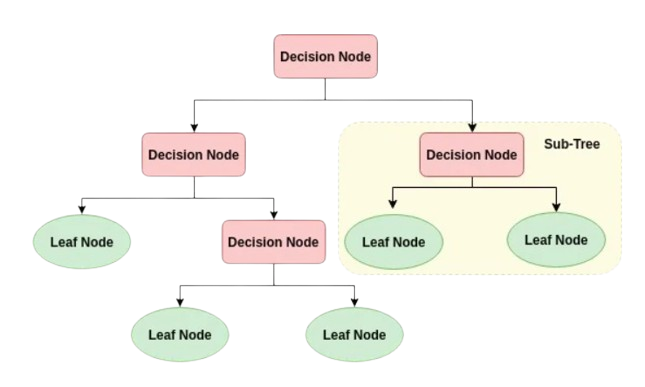

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_tree = tree_model.predict(X_test)

In [ ]:
print("Accuracy Score DecisionTreeClassifier : ", accuracy_score(y_test , y_pred_tree))

Accuracy Score DecisionTreeClassifier :  1.0


In [ ]:
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_tree))


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        16

    accuracy                           1.00        31
   macro avg       1.00      1.00      1.00        31
weighted avg       1.00      1.00      1.00        31



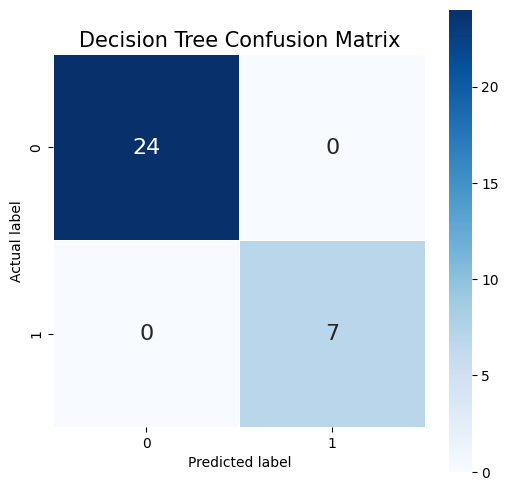

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(6,6))
    sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, square=True, cmap='Blues', annot_kws={"size": 16})
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.title(title, size=15)


# Decision Tree Confusion Matrix
cm_tree = confusion_matrix(y_test, y_pred_tree)
plot_confusion_matrix(cm_tree, 'Decision Tree Confusion Matrix')


plt.show()

### Test

In [ ]:
# Exemple de test avec une nouvelle personne
new_person = {
    'Nom_Soundex': 'B000',
    'Prenom_Soundex': 'C100',
    'CIN': 12345678,
    'Date de naissance': "15/06/1990",
    'Sexe': "M",
    'Lieu': "Sousse",
    'Email': "test@example.com"
}

# Recherche des enregistrements existants avec les mêmes Soundex
existing_records = df_copy[(df_copy['Nom_Soundex'] == new_person['Nom_Soundex']) &
                           (df_copy['Prénom_Soundex'] == new_person['Prenom_Soundex'])]

if not existing_records.empty:
    print(f"{len(existing_records)} enregistrement(s) avec les mêmes Soundex ont été trouvés dans le dataset.")

    for idx, existing_record in existing_records.iterrows():
        print(f"\nTest de l'enregistrement {idx}...")

        # Calcul des correspondances
        new_pair = {
            'Email_Match': int(new_person['Email'] == existing_record['Email']),
            'CIN_Match': int(new_person['CIN'] == existing_record['CIN']),
            'Date_Match': int(new_person['Date de naissance'] == existing_record['Date de naissance']),
            'Sexe_Match': int(new_person['Sexe'] == existing_record['Sexe']),
            'Lieu_Match': int(new_person['Lieu'] == existing_record['Lieu']),
        }

        # Calcul du score de correspondance
        cin_absent = pd.isna(existing_record['CIN']) or pd.isna(new_person['CIN'])

        if new_pair['CIN_Match']:
            score = 100  # CIN correspond, donc 100% de correspondance
        elif new_pair['Email_Match'] and cin_absent:
            score = 100  # Si les emails sont identiques et que le CIN est manquant, 100% de correspondance
        else:
            # Calculer le pourcentage pour les autres critères
            total_criteria = 5  # Date, Sexe, Lieu
            matches = new_pair['Date_Match'] + new_pair['Sexe_Match'] + new_pair['Lieu_Match']
            score = (matches / total_criteria) * 100

        # Afficher le pourcentage de correspondance
        print(f"Le pourcentage de correspondance pour l'enregistrement {idx} est de {score:.2f}%.")

        # Ajouter le score au DataFrame et faire la prédiction avec le modèle
        new_pair_df = pd.DataFrame([new_pair])

        # Prédire si c'est la même personne ou non avec le modèle
        prediction = tree_model.predict(new_pair_df)

        if prediction[0] == 1:
            print(f"Le modèle prédit qu'il s'agit de la même personne pour l'enregistrement {idx}.")
        else:
            print(f"Le modèle prédit qu'il s'agit de personnes différentes pour l'enregistrement {idx}.")
else:
    print("Aucun enregistrement correspondant n'a été trouvé avec les mêmes Soundex.")


4 enregistrement(s) avec les mêmes Soundex ont été trouvés dans le dataset.

Test de l'enregistrement 0...
Le pourcentage de correspondance pour l'enregistrement 0 est de 100.00%.
Le modèle prédit qu'il s'agit de la même personne pour l'enregistrement 0.

Test de l'enregistrement 2...
Le pourcentage de correspondance pour l'enregistrement 2 est de 100.00%.
Le modèle prédit qu'il s'agit de la même personne pour l'enregistrement 2.

Test de l'enregistrement 15...
Le pourcentage de correspondance pour l'enregistrement 15 est de 20.00%.
Le modèle prédit qu'il s'agit de personnes différentes pour l'enregistrement 15.

Test de l'enregistrement 188...
Le pourcentage de correspondance pour l'enregistrement 188 est de 100.00%.
Le modèle prédit qu'il s'agit de la même personne pour l'enregistrement 188.


In [ ]:
new_pair

{'Email_Match': 0,
 'CIN_Match': 1,
 'Date_Match': 0,
 'Sexe_Match': 1,
 'Lieu_Match': 0}

## Support Vector Machine

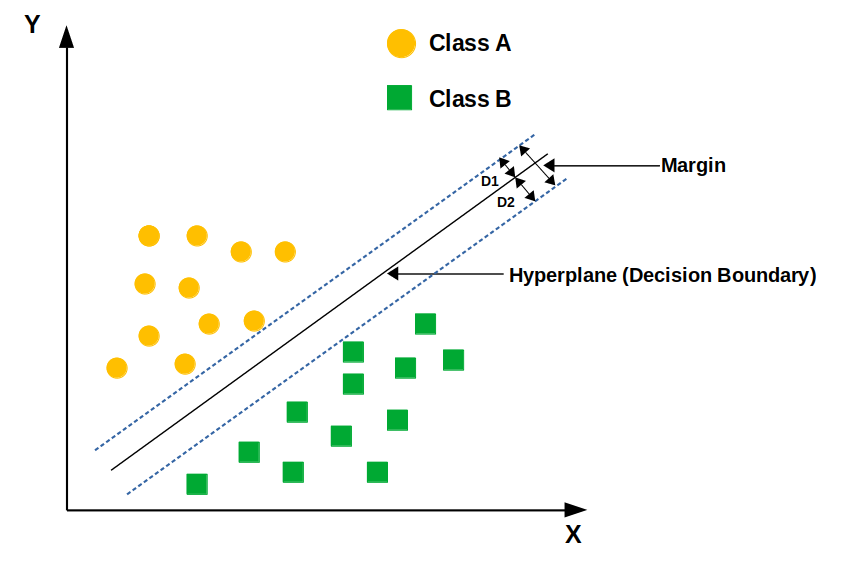

In [ ]:
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [ ]:
# Prédictions sur l'ensemble de test
y_pred_svm = svm_model.predict(X_test)


In [ ]:
print("Accuracy Score svm : ", accuracy_score(y_test , y_pred_svm))

Accuracy Score svm :  1.0


In [ ]:
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_svm))

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00         7

    accuracy                           1.00        31
   macro avg       1.00      1.00      1.00        31
weighted avg       1.00      1.00      1.00        31



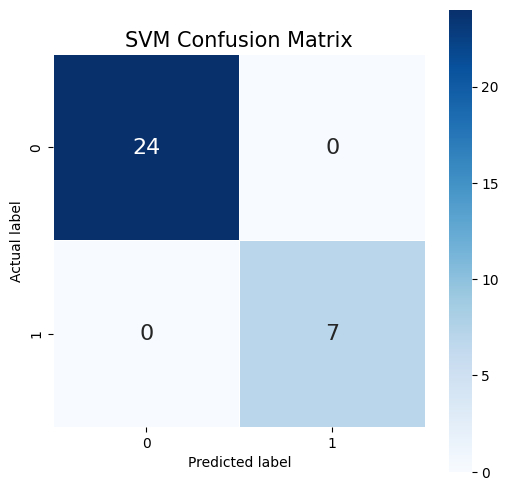

In [ ]:
cm_tree = confusion_matrix(y_test, y_pred_svm)
plot_confusion_matrix(cm_tree, 'SVM Confusion Matrix')


plt.show()

### Test

In [ ]:
# Exemple de test avec une nouvelle personne
new_person = {
    'Nom_Soundex': 'B000',
    'Prenom_Soundex': 'C100',
    'CIN': 12345678,
    'Date de naissance': "15/06/1990",
    'Sexe': "M",
    'Lieu': "Sousse",
    'Email': "test@example.com"
}

# Recherche des enregistrements existants avec les mêmes Soundex
existing_records = df_copy[(df_copy['Nom_Soundex'] == new_person['Nom_Soundex']) &
                           (df_copy['Prénom_Soundex'] == new_person['Prenom_Soundex'])]

if not existing_records.empty:
    print(f"{len(existing_records)} enregistrement(s) avec les mêmes Soundex ont été trouvés dans le dataset.")

    for idx, existing_record in existing_records.iterrows():
        print(f"\nTest de l'enregistrement {idx}...")

        # Calcul des correspondances
        new_pair = {
            'Email_Match': int(new_person['Email'] == existing_record['Email']),
            'CIN_Match': int(new_person['CIN'] == existing_record['CIN']),
            'Date_Match': int(new_person['Date de naissance'] == existing_record['Date de naissance']),
            'Sexe_Match': int(new_person['Sexe'] == existing_record['Sexe']),
            'Lieu_Match': int(new_person['Lieu'] == existing_record['Lieu']),
        }

        # Calcul du score de correspondance
        cin_absent = pd.isna(existing_record['CIN']) or pd.isna(new_person['CIN'])

        if new_pair['CIN_Match']:
            score = 100  # CIN correspond, donc 100% de correspondance
        elif new_pair['Email_Match'] and cin_absent:
            score = 100  # Si les emails sont identiques et que le CIN est manquant, 100% de correspondance
        else:
            # Calculer le pourcentage pour les autres critères
            total_criteria = 5  # Date, Sexe, Lieu
            matches = new_pair['Date_Match'] + new_pair['Sexe_Match'] + new_pair['Lieu_Match']
            score = (matches / total_criteria) * 100

        # Afficher le pourcentage de correspondance
        print(f"Le pourcentage de correspondance pour l'enregistrement {idx} est de {score:.2f}%.")

        # Ajouter le score au DataFrame et faire la prédiction avec le modèle
        new_pair_df = pd.DataFrame([new_pair])

        # Prédire si c'est la même personne ou non avec le modèle
        prediction = svm_model.predict(new_pair_df)

        if prediction[0] == 1:
            print(f"Le modèle prédit qu'il s'agit de la même personne pour l'enregistrement {idx}.")
        else:
            print(f"Le modèle prédit qu'il s'agit de personnes différentes pour l'enregistrement {idx}.")
else:
    print("Aucun enregistrement correspondant n'a été trouvé avec les mêmes Soundex.")


4 enregistrement(s) avec les mêmes Soundex ont été trouvés dans le dataset.

Test de l'enregistrement 0...
Le pourcentage de correspondance pour l'enregistrement 0 est de 100.00%.
Le modèle prédit qu'il s'agit de la même personne pour l'enregistrement 0.

Test de l'enregistrement 2...
Le pourcentage de correspondance pour l'enregistrement 2 est de 100.00%.
Le modèle prédit qu'il s'agit de la même personne pour l'enregistrement 2.

Test de l'enregistrement 15...
Le pourcentage de correspondance pour l'enregistrement 15 est de 20.00%.
Le modèle prédit qu'il s'agit de personnes différentes pour l'enregistrement 15.

Test de l'enregistrement 188...
Le pourcentage de correspondance pour l'enregistrement 188 est de 100.00%.
Le modèle prédit qu'il s'agit de la même personne pour l'enregistrement 188.


## XGBoost Classifier

In [ ]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred_xgb = xgb.predict(X_test)


In [ ]:
print("Accuracy Score xgb : ", accuracy_score(y_test , y_pred_xgb))

Accuracy Score xgb :  1.0


In [ ]:
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00         7

    accuracy                           1.00        31
   macro avg       1.00      1.00      1.00        31
weighted avg       1.00      1.00      1.00        31



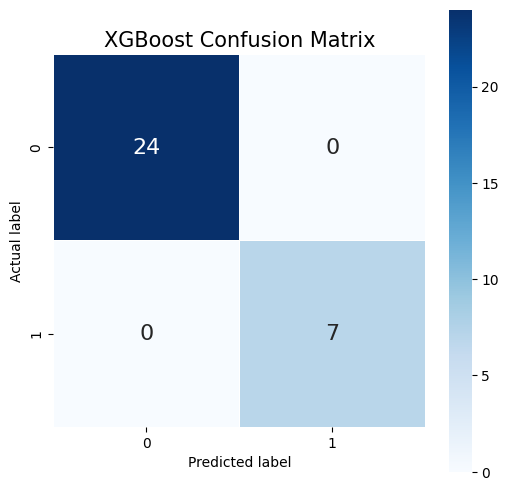

In [ ]:
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plot_confusion_matrix(cm_xgb, 'XGBoost Confusion Matrix')
plt.show()

### Test

In [ ]:
# Exemple de test avec une nouvelle personne
new_person = {
    'Nom_Soundex': 'B000',
    'Prenom_Soundex': 'C100',
    'CIN': 12345678,
    'Date de naissance': "15/06/1990",
    'Sexe': "M",
    'Lieu': "Sousse",
    'Email': "test@example.com"
}

# Recherche des enregistrements existants avec les mêmes Soundex
existing_records = df_copy[(df_copy['Nom_Soundex'] == new_person['Nom_Soundex']) &
                           (df_copy['Prénom_Soundex'] == new_person['Prenom_Soundex'])]

if not existing_records.empty:
    print(f"{len(existing_records)} enregistrement(s) avec les mêmes Soundex ont été trouvés dans le dataset.")

    for idx, existing_record in existing_records.iterrows():
        print(f"\nTest de l'enregistrement {idx}...")

        # Calcul des correspondances
        new_pair = {
            'Email_Match': int(new_person['Email'] == existing_record['Email']),
            'CIN_Match': int(new_person['CIN'] == existing_record['CIN']),
            'Date_Match': int(new_person['Date de naissance'] == existing_record['Date de naissance']),
            'Sexe_Match': int(new_person['Sexe'] == existing_record['Sexe']),
            'Lieu_Match': int(new_person['Lieu'] == existing_record['Lieu']),
        }

        # Calcul du score de correspondance
        cin_absent = pd.isna(existing_record['CIN']) or pd.isna(new_person['CIN'])

        if new_pair['CIN_Match']:
            score = 100  # CIN correspond, donc 100% de correspondance
        elif new_pair['Email_Match'] and cin_absent:
            score = 100  # Si les emails sont identiques et que le CIN est manquant, 100% de correspondance
        else:
            # Calculer le pourcentage pour les autres critères
            total_criteria = 5  # Date, Sexe, Lieu
            matches = new_pair['Date_Match'] + new_pair['Sexe_Match'] + new_pair['Lieu_Match']
            score = (matches / total_criteria) * 100

        # Afficher le pourcentage de correspondance
        print(f"Le pourcentage de correspondance pour l'enregistrement {idx} est de {score:.2f}%.")

        # Ajouter le score au DataFrame et faire la prédiction avec le modèle
        new_pair_df = pd.DataFrame([new_pair])

        # Prédire si c'est la même personne ou non avec le modèle
        prediction = xgb.predict(new_pair_df)

        if prediction[0] == 1:
            print(f"Le modèle prédit qu'il s'agit de la même personne pour l'enregistrement {idx}.")
        else:
            print(f"Le modèle prédit qu'il s'agit de personnes différentes pour l'enregistrement {idx}.")
else:
    print("Aucun enregistrement correspondant n'a été trouvé avec les mêmes Soundex.")


4 enregistrement(s) avec les mêmes Soundex ont été trouvés dans le dataset.

Test de l'enregistrement 0...
Le pourcentage de correspondance pour l'enregistrement 0 est de 100.00%.
Le modèle prédit qu'il s'agit de la même personne pour l'enregistrement 0.

Test de l'enregistrement 2...
Le pourcentage de correspondance pour l'enregistrement 2 est de 100.00%.
Le modèle prédit qu'il s'agit de la même personne pour l'enregistrement 2.

Test de l'enregistrement 15...
Le pourcentage de correspondance pour l'enregistrement 15 est de 20.00%.
Le modèle prédit qu'il s'agit de personnes différentes pour l'enregistrement 15.

Test de l'enregistrement 188...
Le pourcentage de correspondance pour l'enregistrement 188 est de 100.00%.
Le modèle prédit qu'il s'agit de la même personne pour l'enregistrement 188.


In [ ]:
import pickle

# Sauvegarder le modèle dans le répertoire local de Colab
pickle.dump(tree_model, open('dectree_model.p', 'wb'))